# HUMAN ACTIVITY RECOGNITION PROJECT FOR SFL SCIENTIFIC

In [1]:
## initial setup for google drive and colab
import glob
import importlib
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
import os
pathtodata = '/content/gdrive/My Drive/Activity Recognition from Single Chest-Mounted Accelerometer/'
os.chdir(pathtodata)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Initial Thoughts
### Objective: Time-series classification with accelarator xyz data
### Note: 
1. How the windowing of the data will affect the analysis? Minimal window of data to predict each class. 

https://arxiv.org/pdf/1701.07681.pdf
https://github.com/big-data-lab-team/paper-generalizability-window-size

### Criteria
1. code and visual
2. feature
https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/
3. model validation
https://github.com/arturjordao/WearableSensorData
https://github.com/patrickzib/SFA_Python/blob/master/src/transformation/SFA.py
https://arxiv.org/pdf/1904.02666.pdf
4. conclusion


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf

%matplotlib inline
plt.style.use('ggplot')

def read_data(file_path):
    column_names = ['index','x-axis', 'y-axis', 'z-axis','class']
    data = pd.read_csv(file_path,header = None, names = column_names)
    data = data.loc[:,['x-axis', 'y-axis', 'z-axis','class']]
    return data

def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma

def prep_all(i,pathtodata):
    dataset = read_data(pathtodata+str(i)+'.csv')
    dataset.dropna(axis=0, how='any', inplace= True)
    dataset['x-axis'] = feature_normalize(dataset['x-axis'])
    dataset['y-axis'] = feature_normalize(dataset['y-axis'])
    dataset['z-axis'] = feature_normalize(dataset['z-axis'])
    #dataset['index'] = dataset['index'].astype(int)
    return dataset

In [0]:
ds = []
for i in range(15):
  ds.append(prep_all(i+1,pathtodata))

## Exploratory Data Analysis

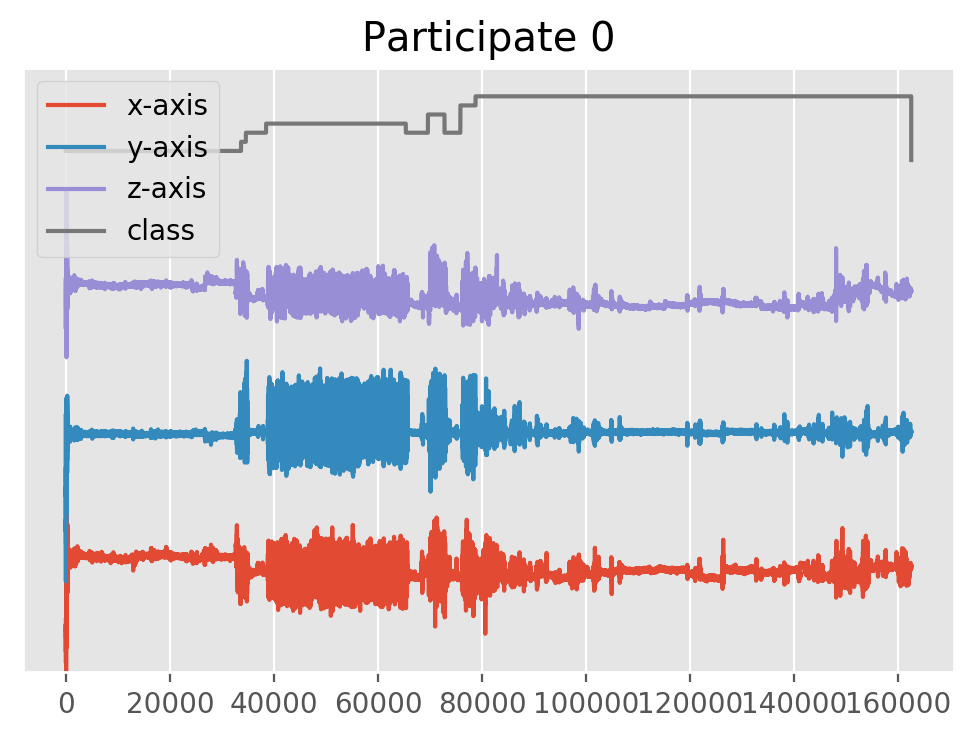

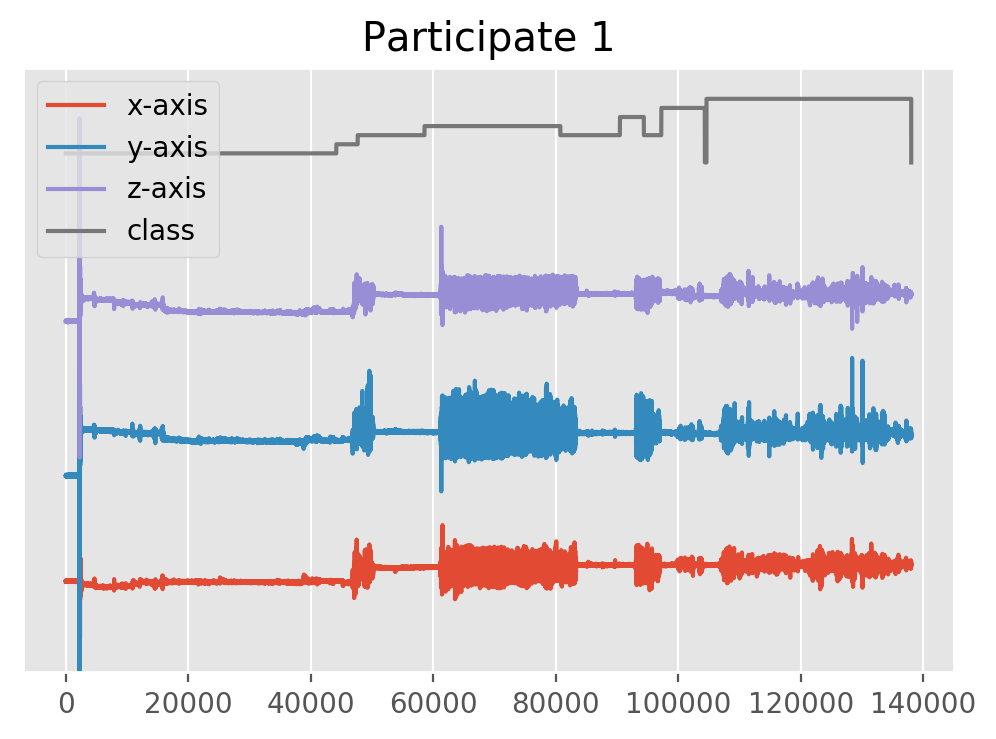

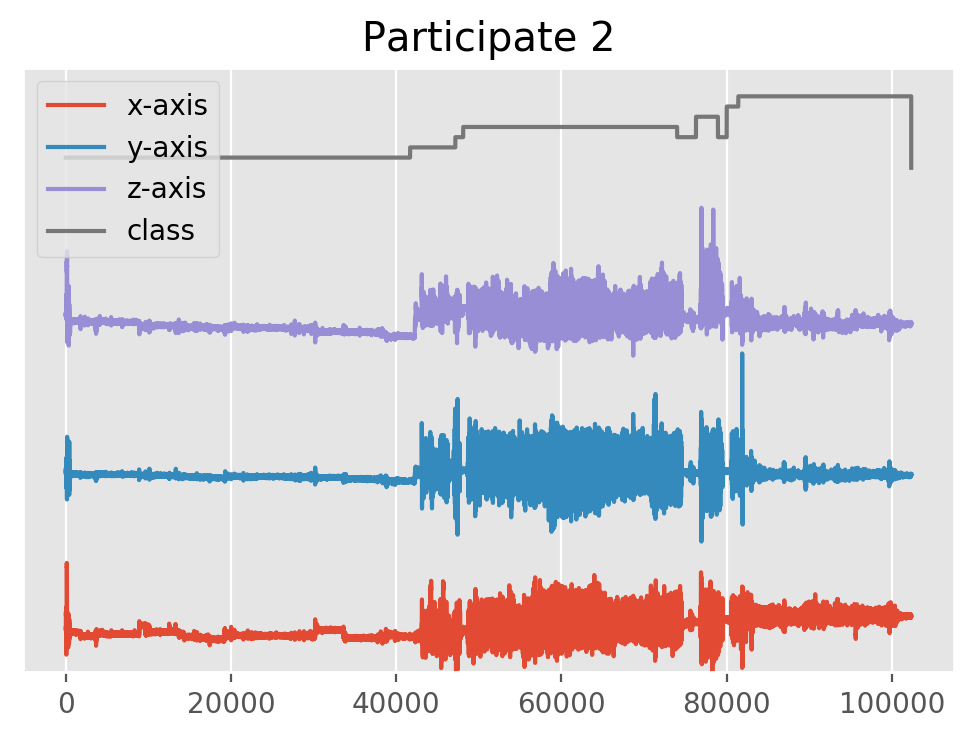

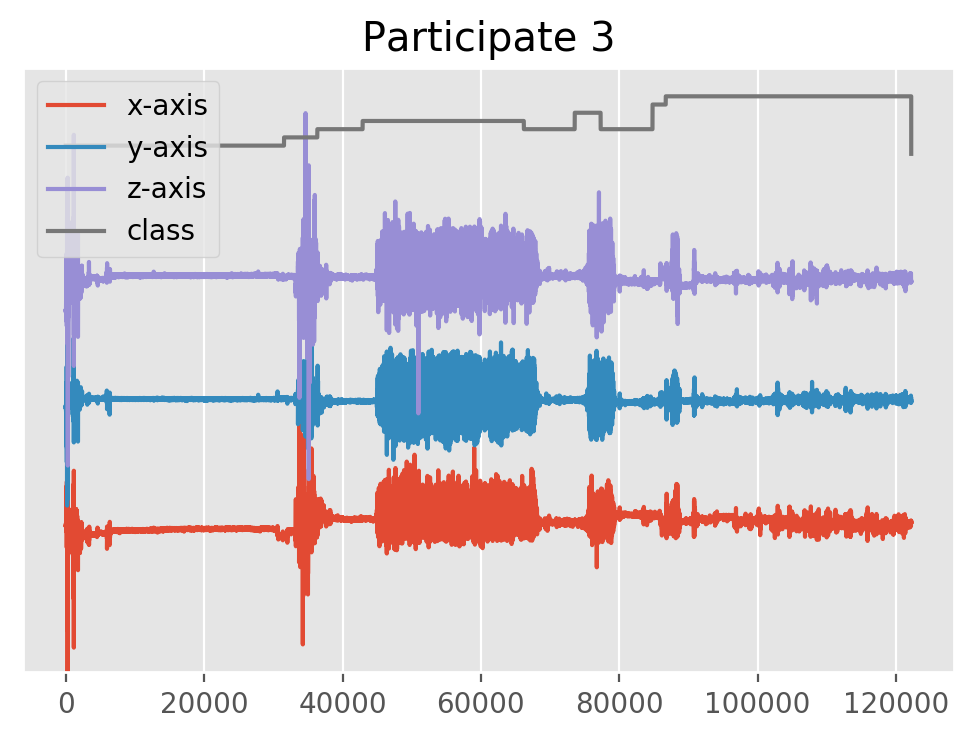

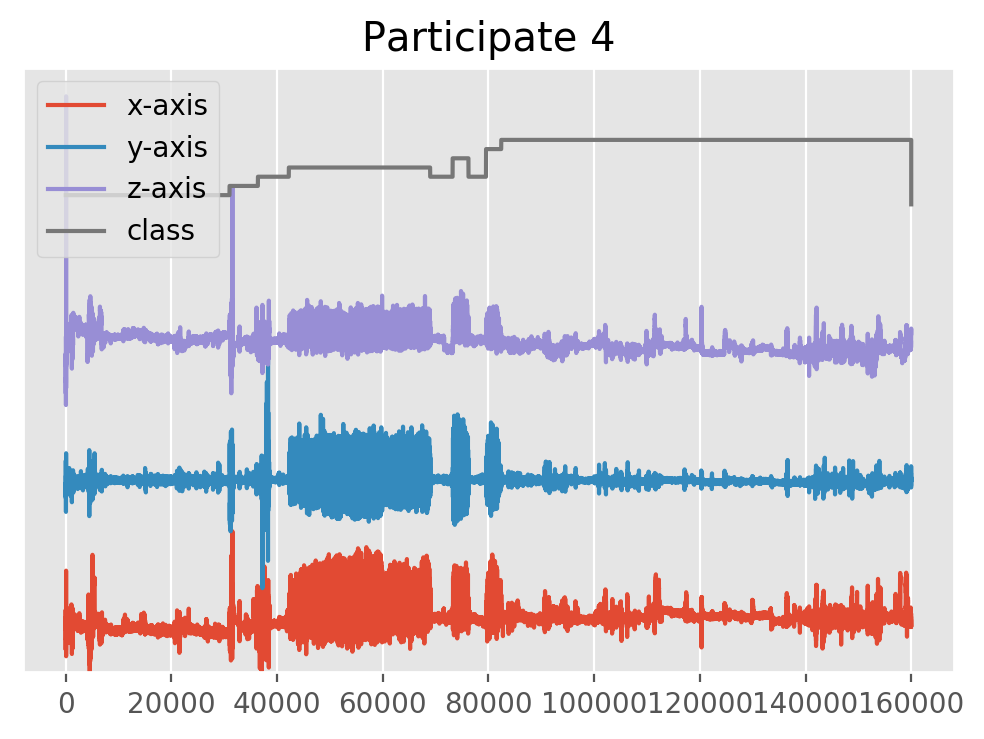

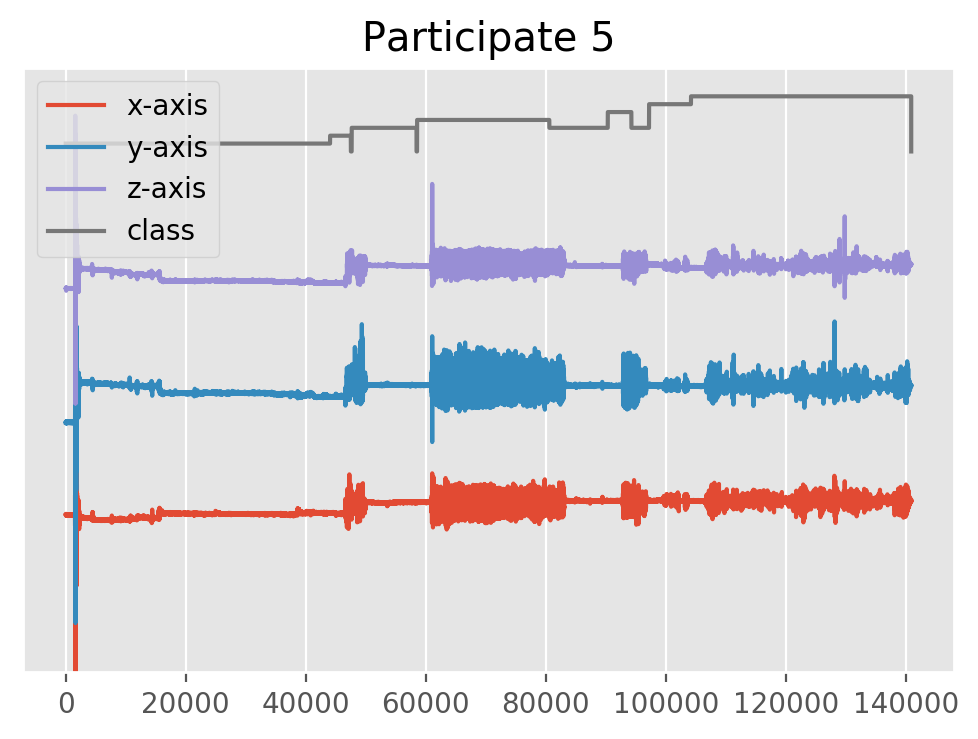

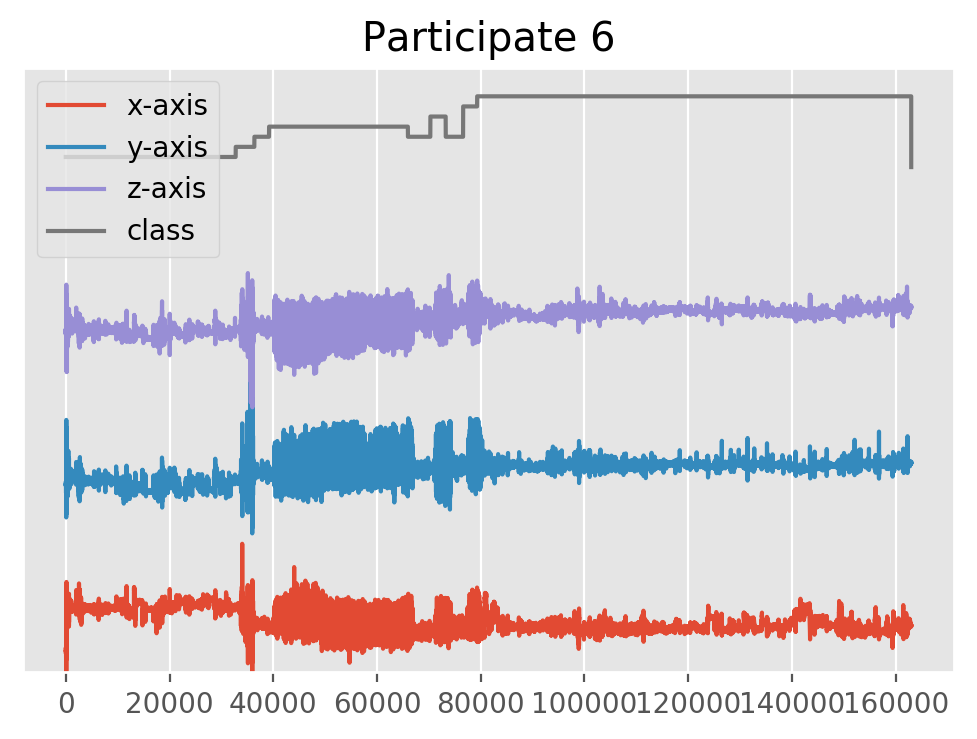

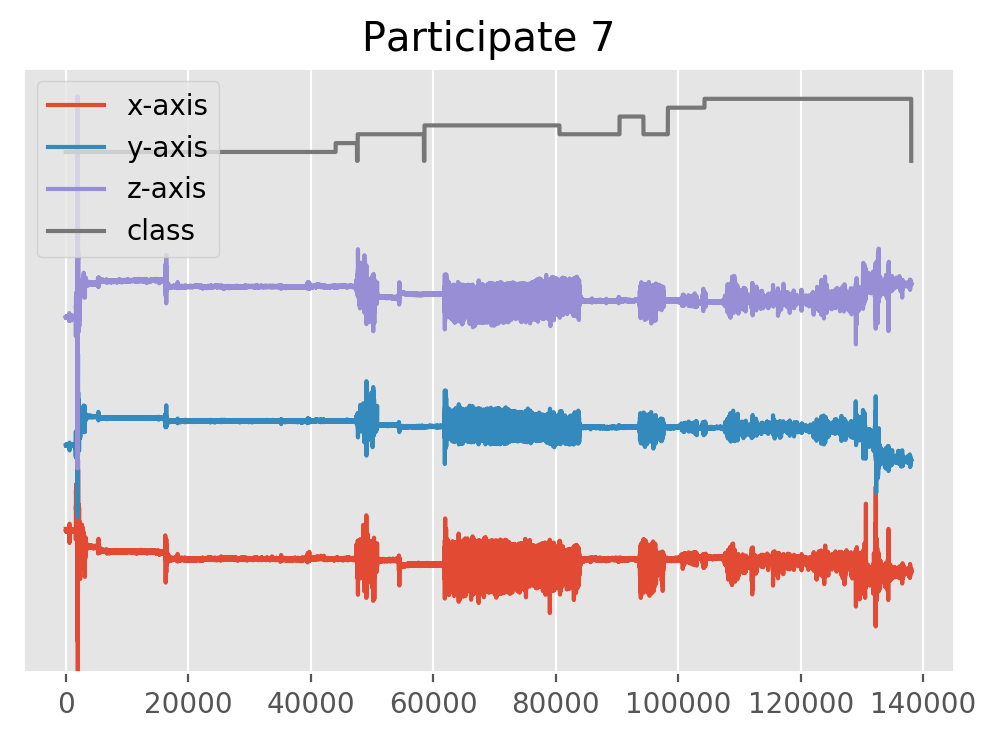

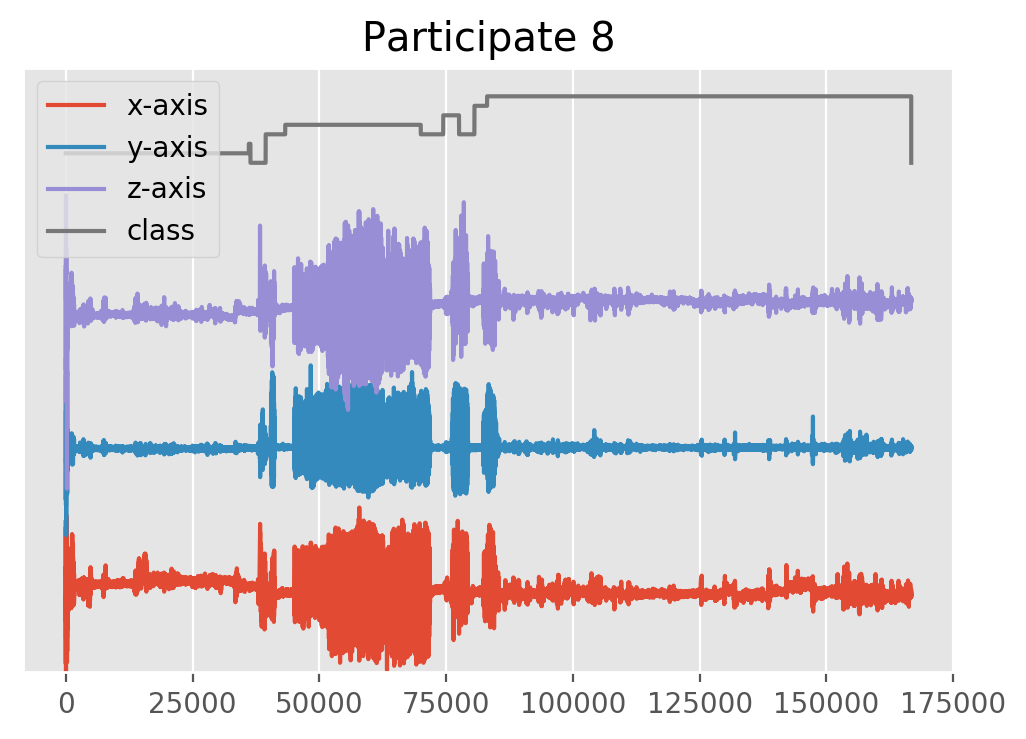

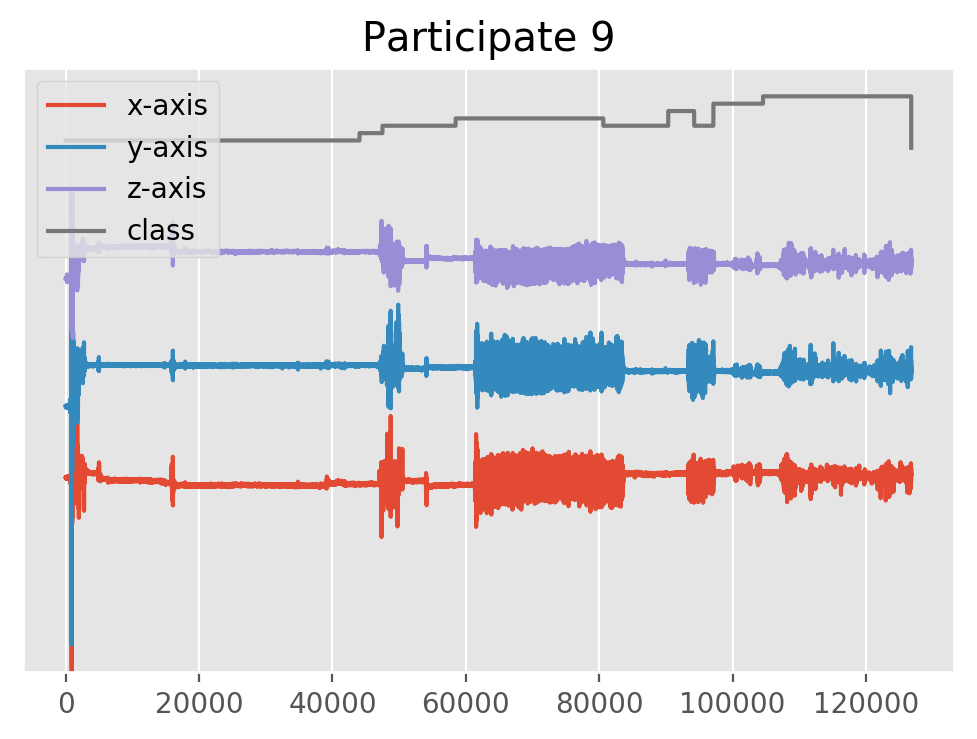

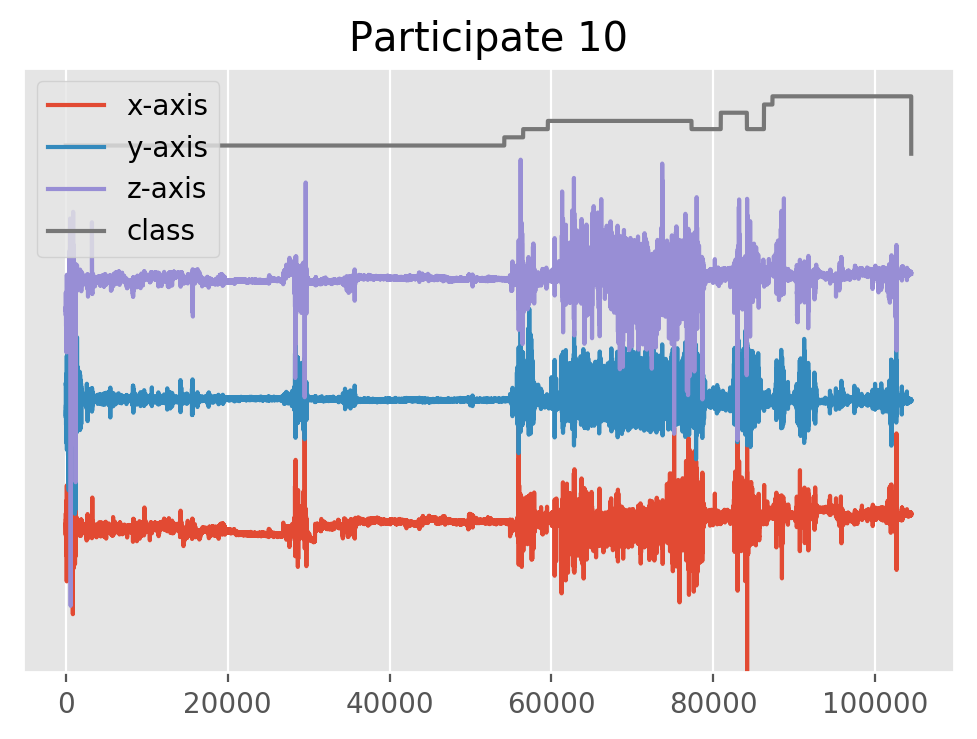

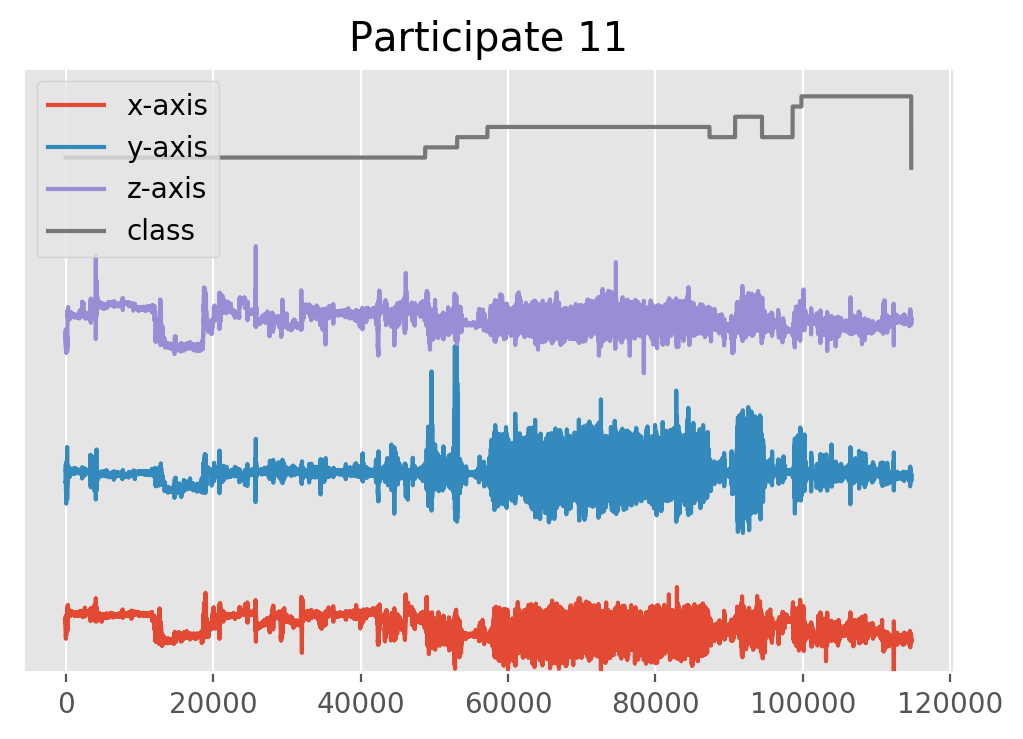

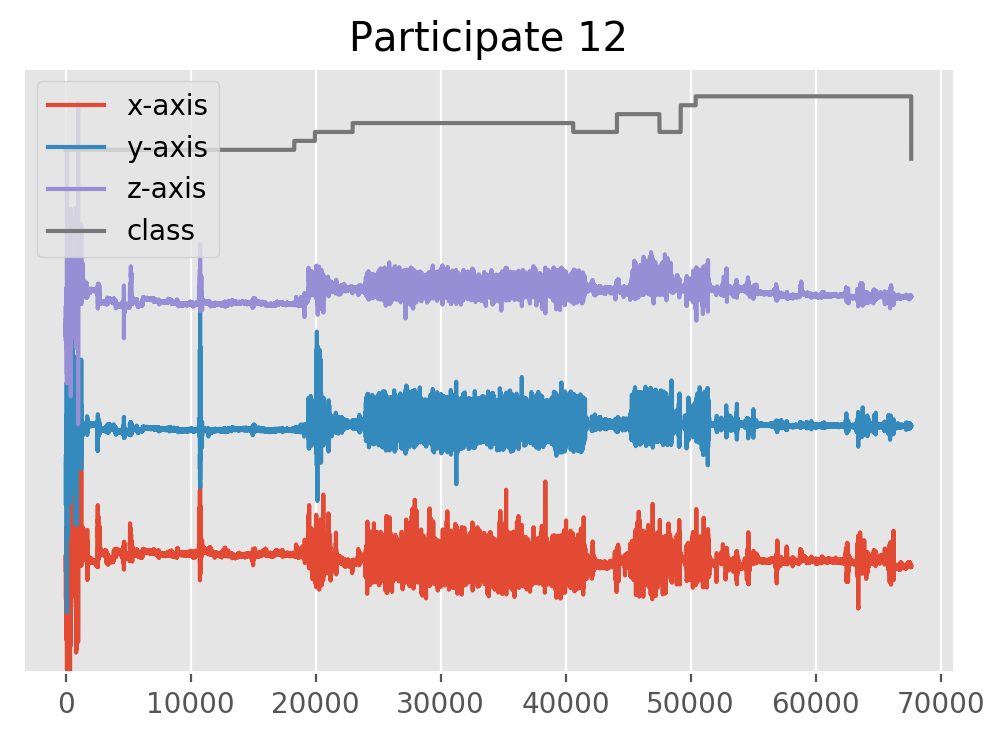

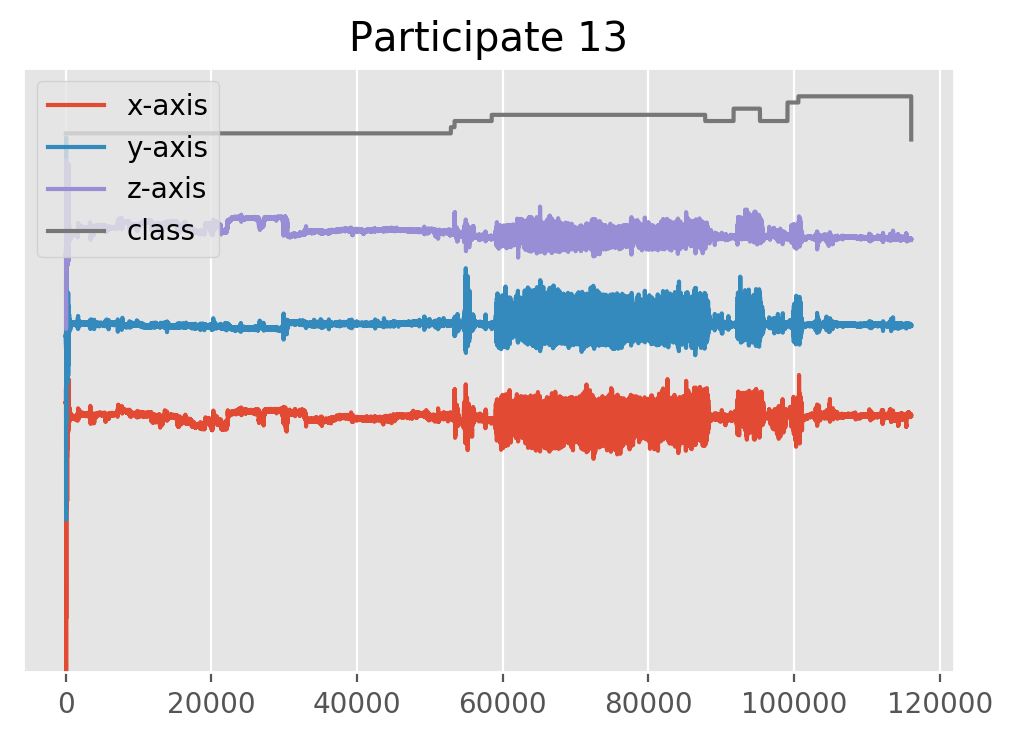

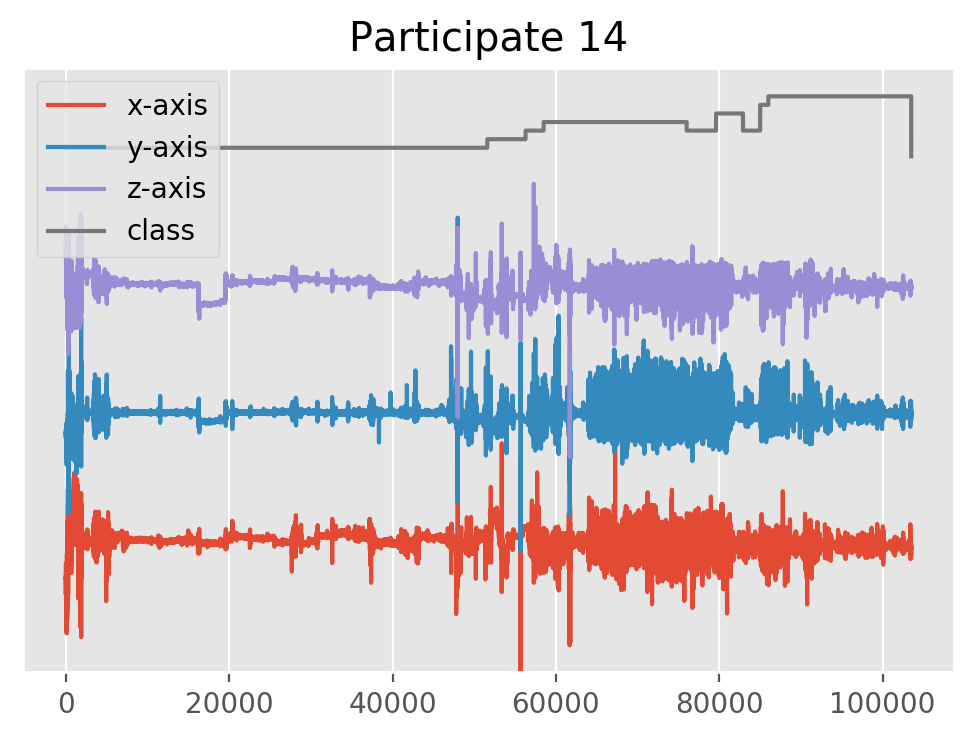

In [4]:
# Quick look at the data
for i in range(15):
  plt.figure(dpi=200)
  ax = plt.subplot(1,1,1)
  subject = ds[i]
  for k, col in enumerate(subject.columns):
    ax.plot(15*k+subject[col],label=col)
  ax.set_title("Participate "+str(i))
  ax.set_ylim(min(subject['x-axis']), )
  plt.legend(loc=2)
  ax.set_yticks([])
  plt.show()

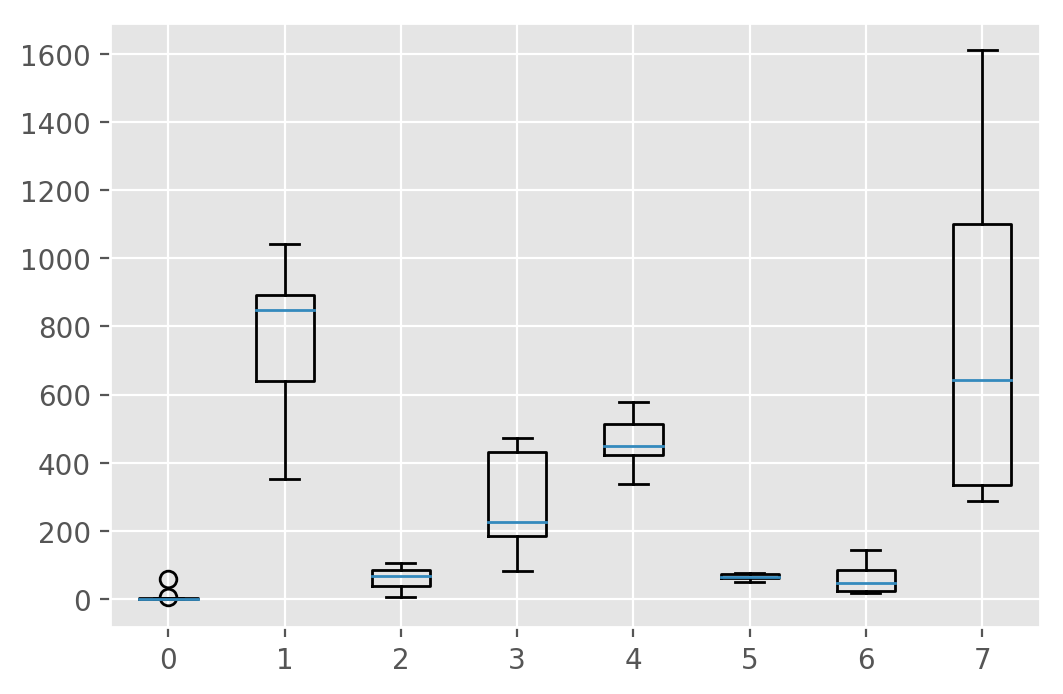

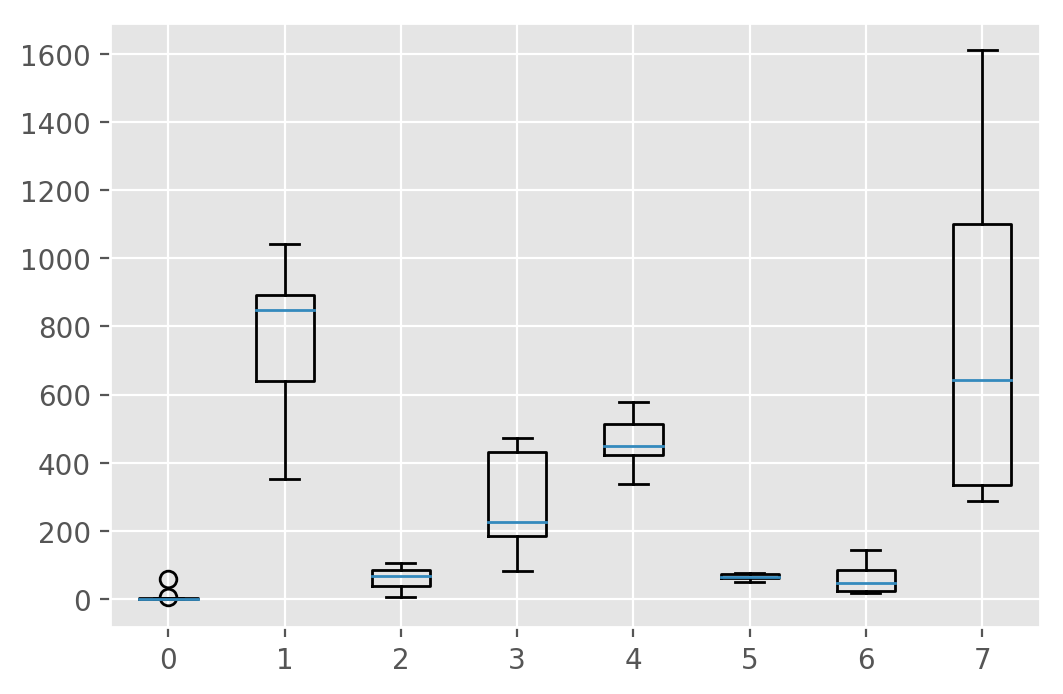

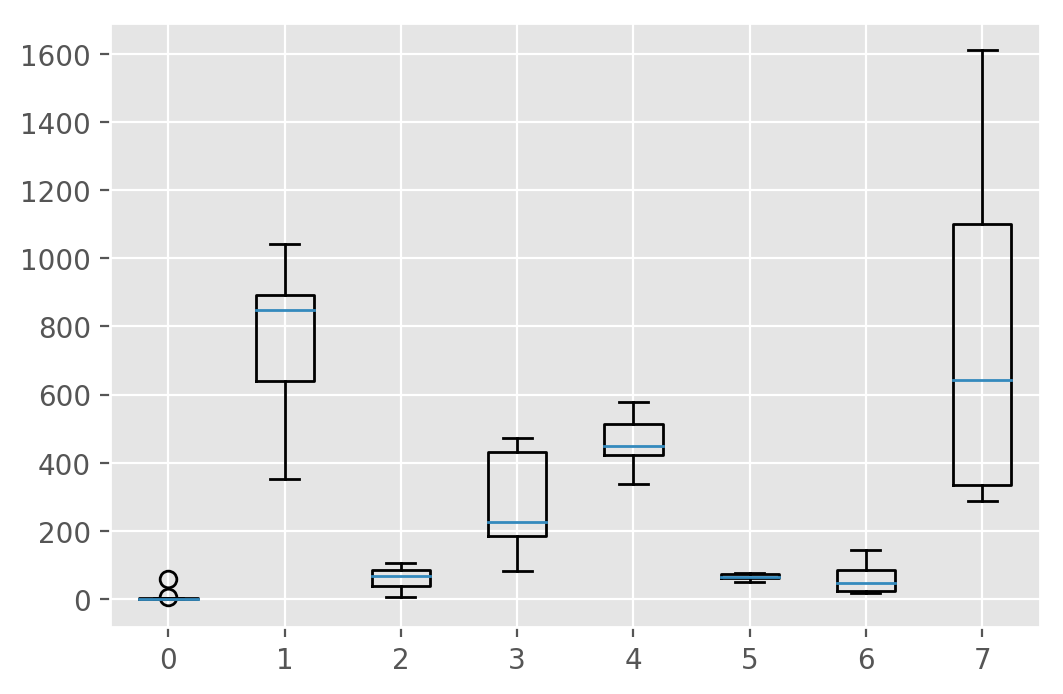

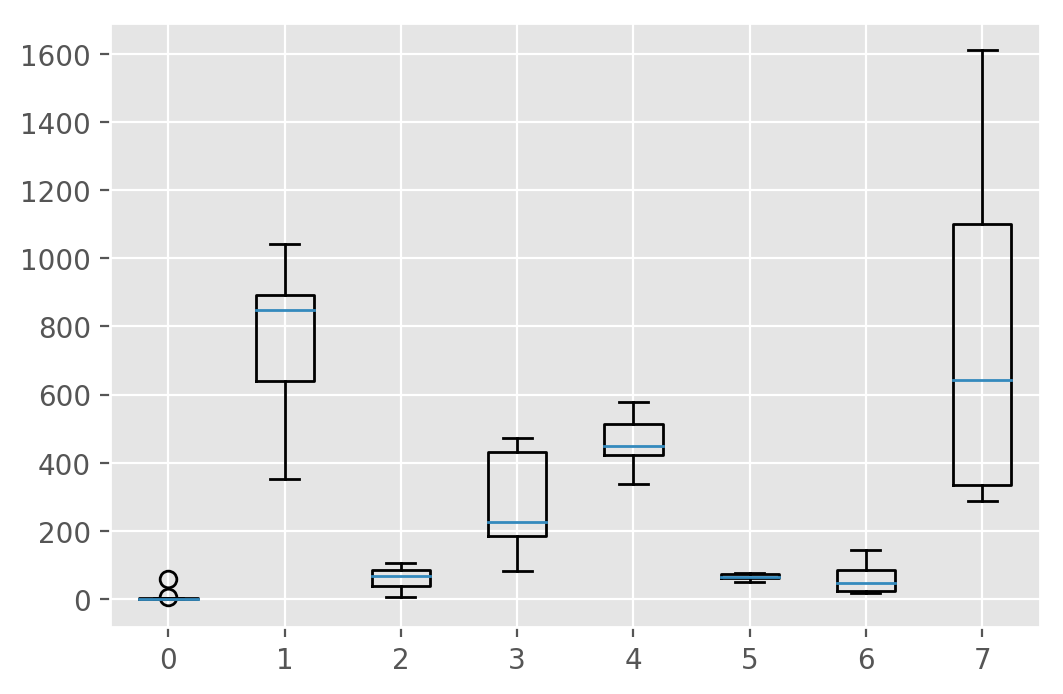

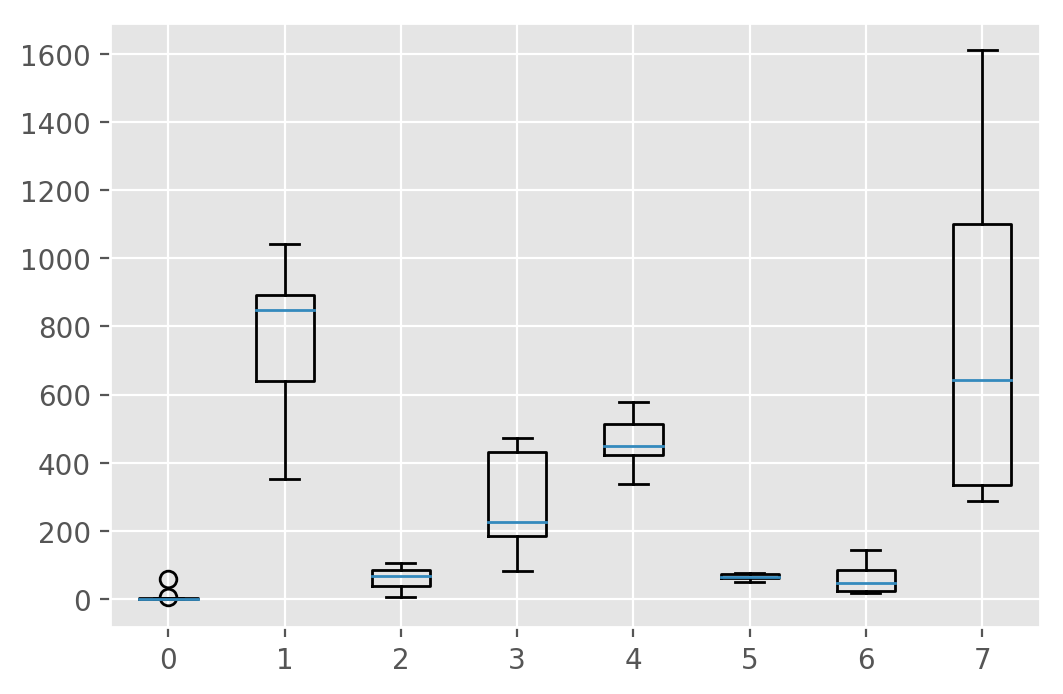

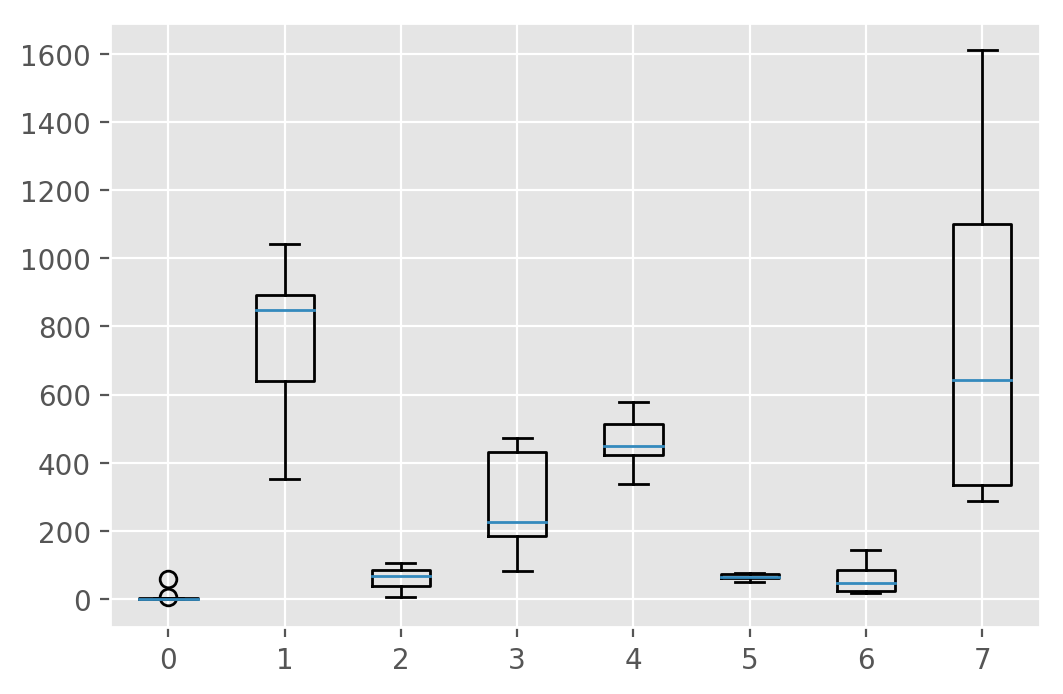

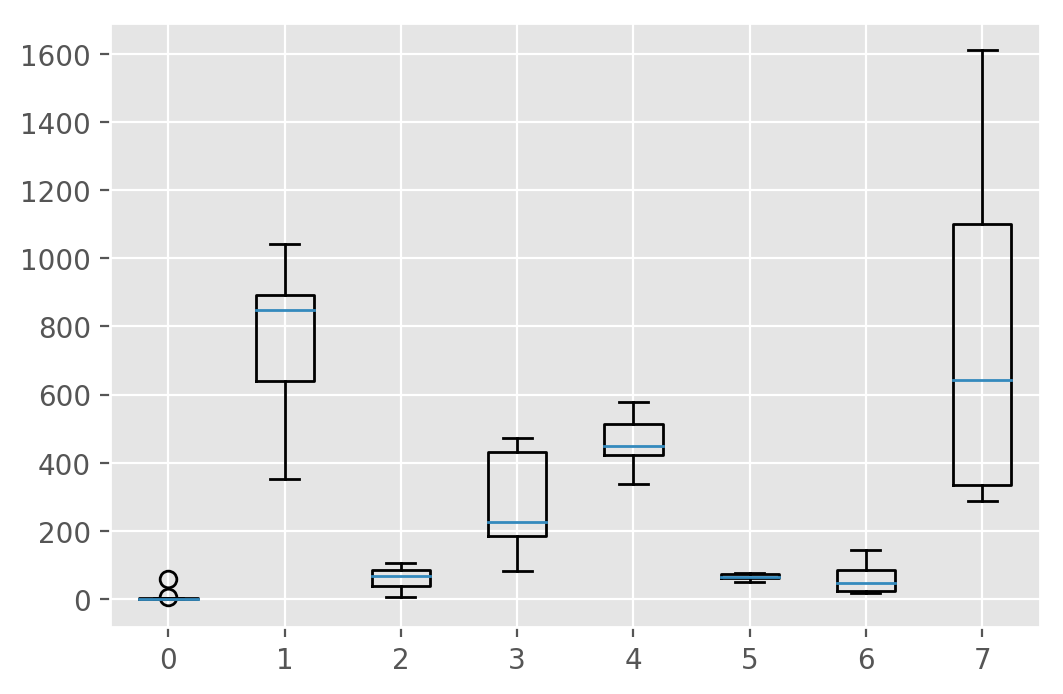

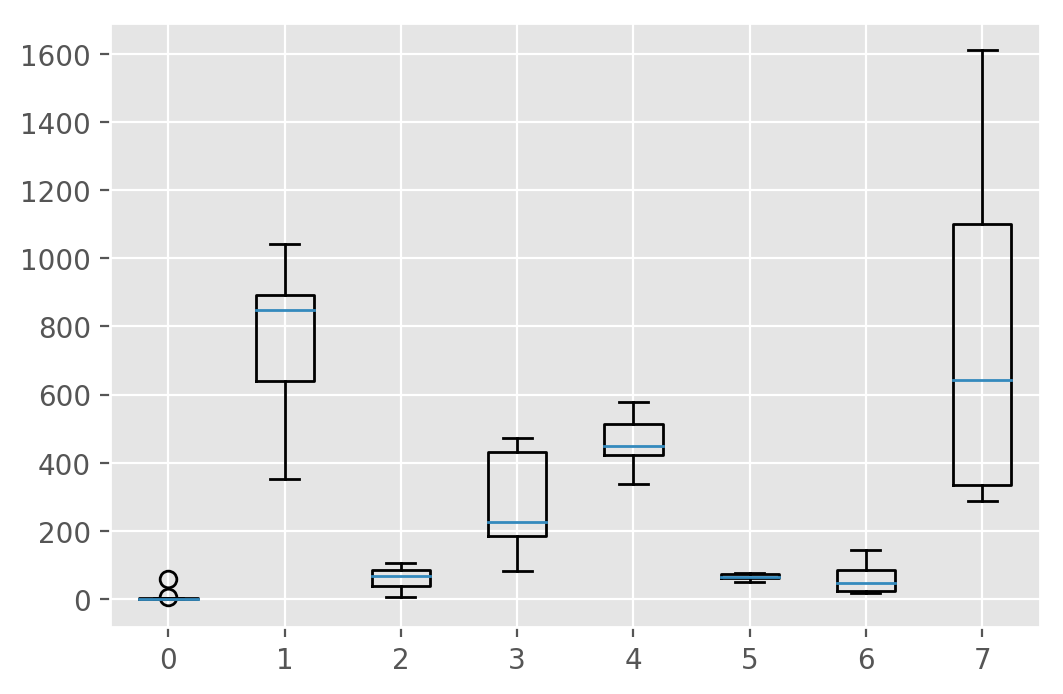

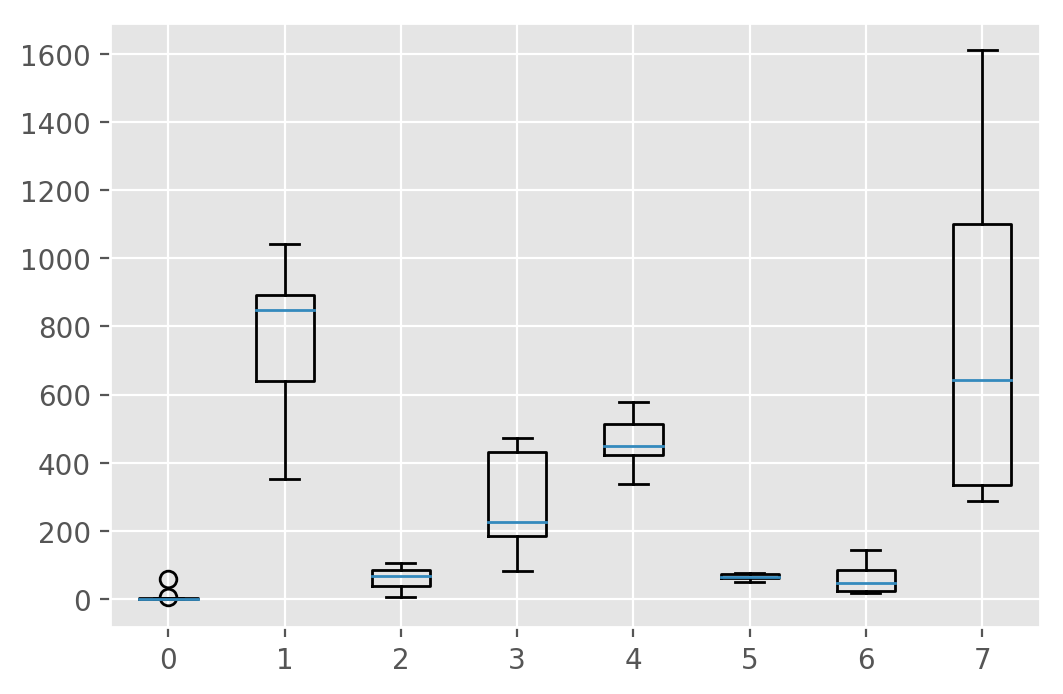

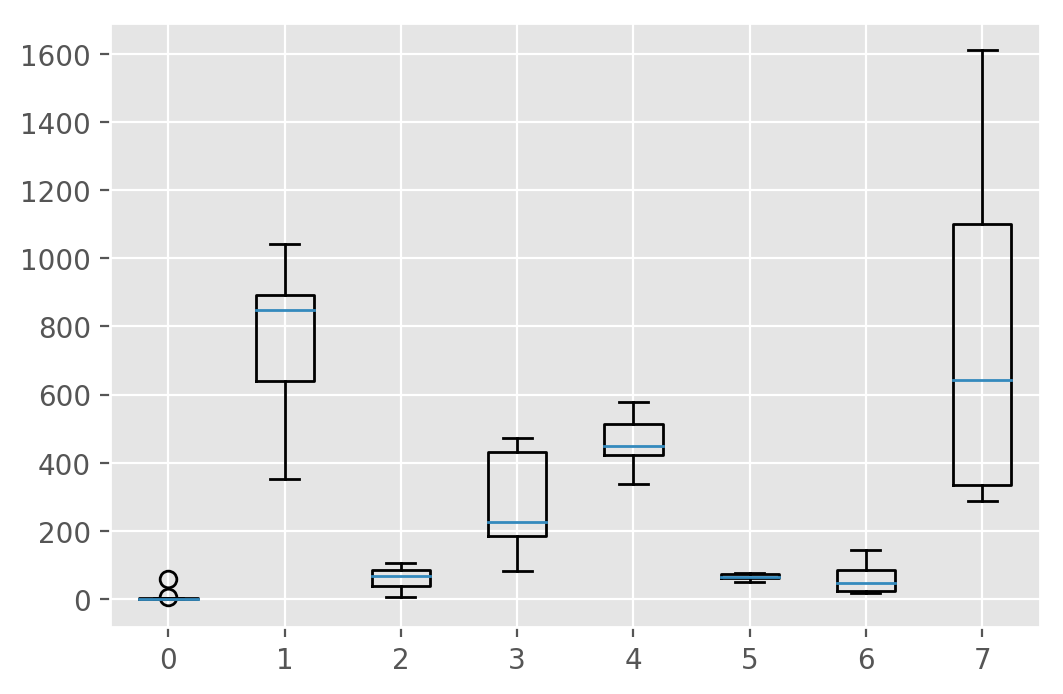

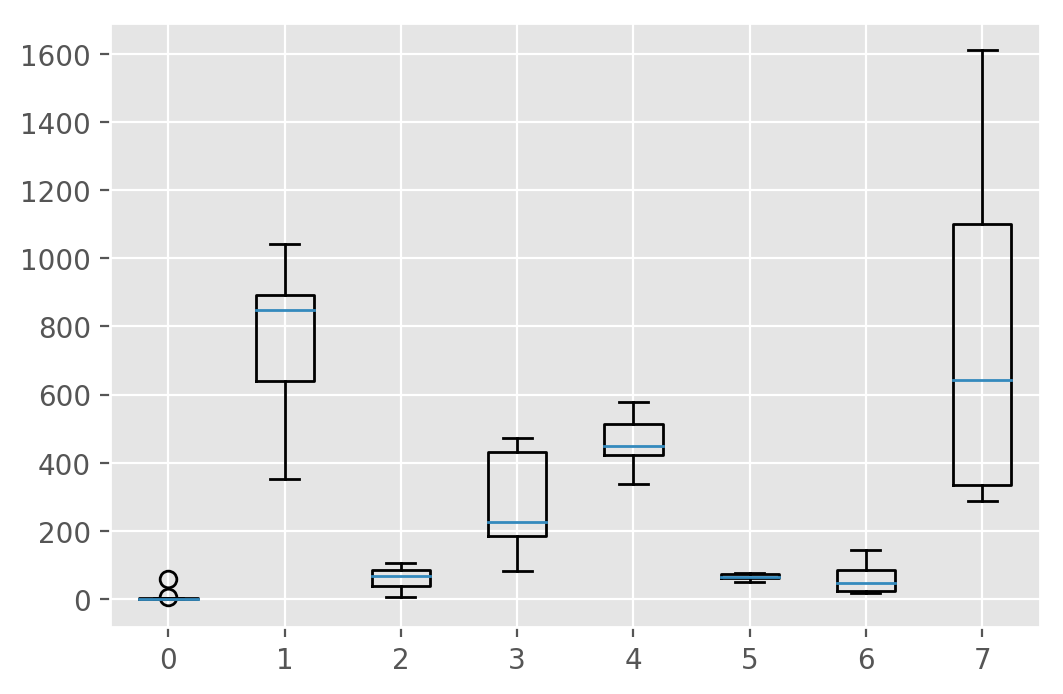

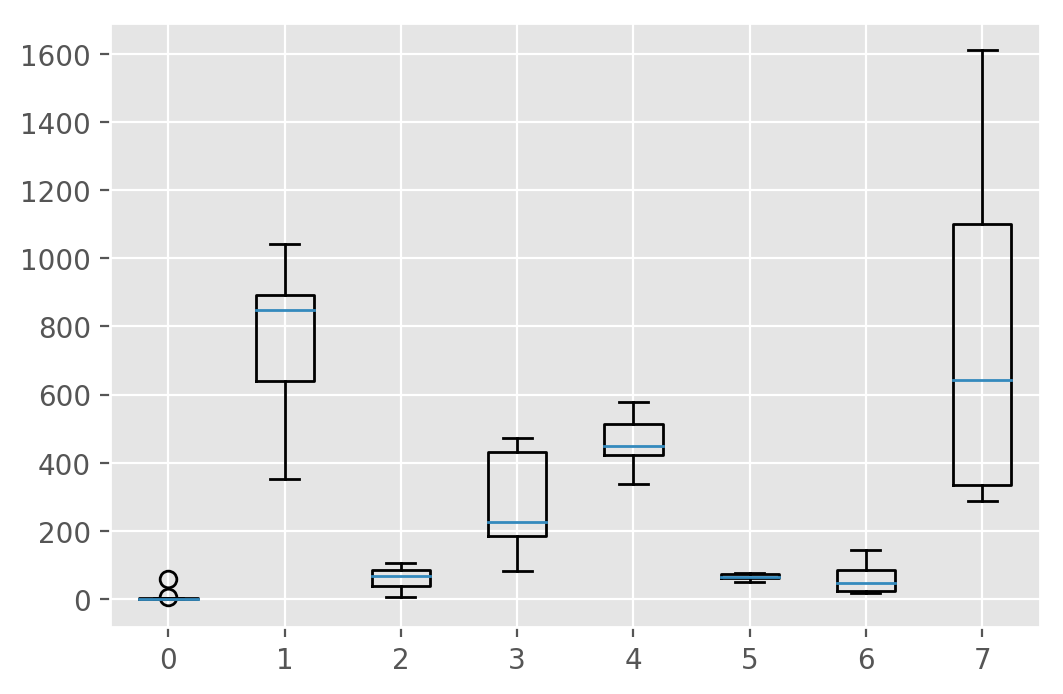

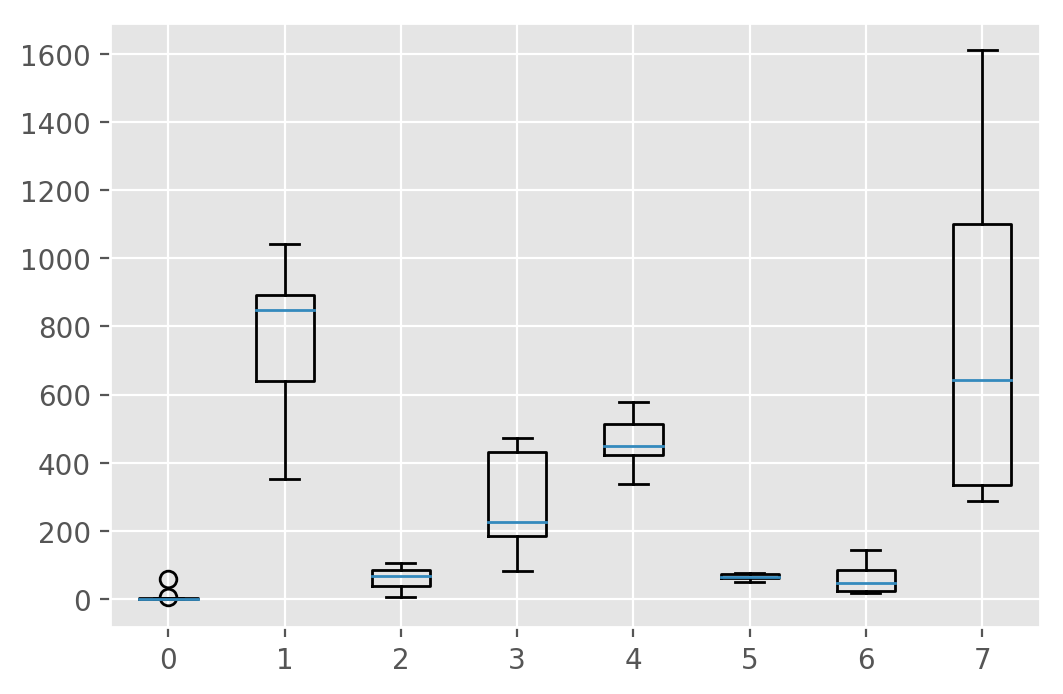

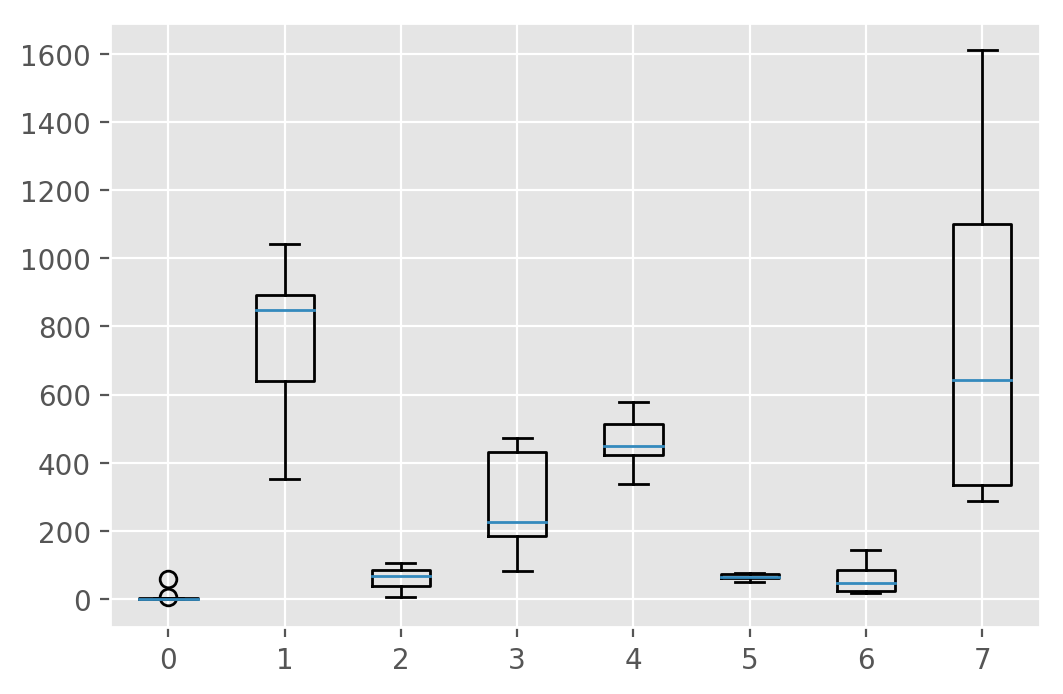

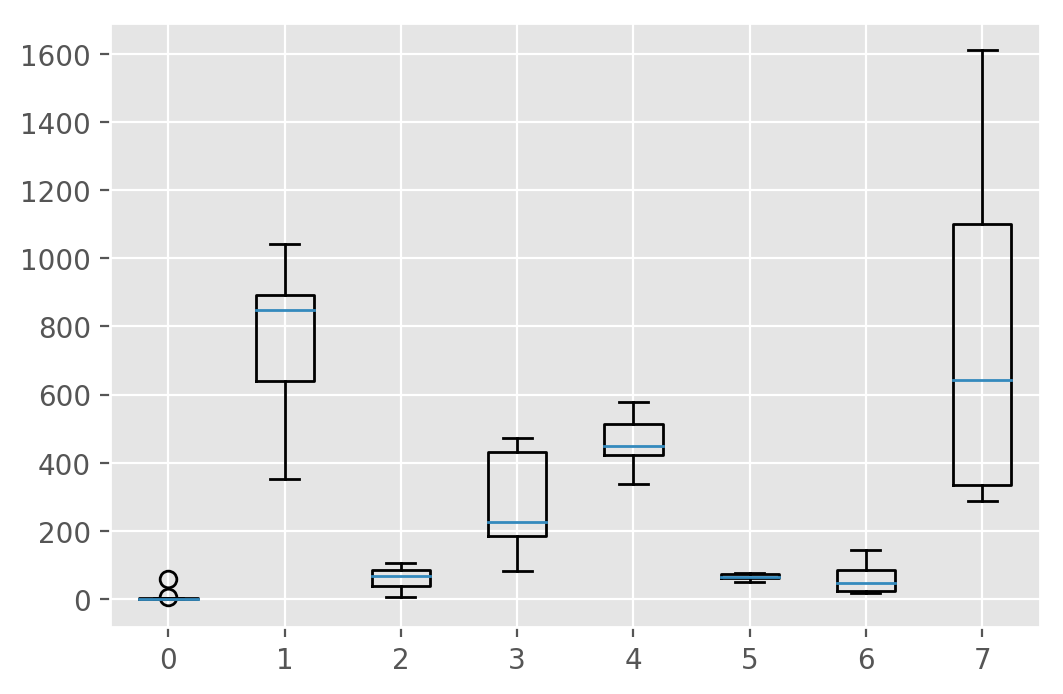

In [5]:
# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(subjects, activities):
	grouped = [{a:s.loc[s['class']==a] for a in activities} for s in subjects]
	return grouped
 
# calculate total duration in sec for each activity per subject and plot
def plot_durations(grouped, activities):
	# calculate the lengths for each activity for each subject
	freq = 52
	durations = [[len(s[a])/freq for s in grouped] for a in activities]
	plt.boxplot(durations, labels=activities)
	plt.show()
  


for i in range(15): 
  plt.figure(dpi=200)
  activities = [i for i in range(0,8)]
  grouped = group_by_activity(ds, activities)
  # plot durations
  plot_durations(grouped, activities)

* 1: Working at Computer (workingPC).
* 2: Standing Up, Walking and Going up/down stairs.
* 3: Standing (standing).
* 4: Walking (waking).
* 5: Going Up/Down Stairs (stairs).
* 6: Walking and Talking with Someone.
* 7: Talking while Standing (talking).

- Stationary activities: 1/3
- Dynamic: 4/5/6/7
- Transitional: 2


### maybe divide to groups first and then more spectific class. 

In [0]:
## windowing from large to small all range to 1e-3 of the range?
## Break samples to pieces by class and then windowing by various sizes.
## threshold: > 1/10 sec?--5 timestamps?


### Reference: 

https://github.com/yqf3139

https://ieeexplore.ieee.org/document/8538429

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4029702/pdf/sensors-14-06474.pdf

https://reader.elsevier.com/reader/sd/pii/S1532046416300594?token=5D2A83D6402AD11EE149F3643212C6ADFBFE0A7FE65060E311070FB85BFAD3ACFAC90F0135896FB5DD4F9816512812C2

https://www.usf.edu/engineering/cse/documents/recent-research-paper.pdf


https://arxiv.org/pdf/1806.05226.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5855052/pdf/sensors-18-00679.pdf

https://pdfs.semanticscholar.org/fbe1/653acc01115520283a4446838162824758fc.pdf?_ga=2.56044395.1144404057.1557174969-565534678.1555800681